In [53]:
# Download Model File
# https://drive.google.com/drive/folders/12EaJfA0yl3Ul0c7PzzrsUwDm3UbfE8nX?usp=sharing

In [ ]:
! pip install torch==1.12.0 torchvision
import os
os.kill(os.getpid(), 9)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/cuda-ubuntu2004.pin
!sudo mv cuda-ubuntu2004.pin /etc/apt/preferences.d/cuda-repository-pin-600
!wget https://developer.download.nvidia.com/compute/cuda/11.4.0/local_installers/cuda-repo-ubuntu2004-11-4-local_11.4.0-470.42.01-1_amd64.deb


--2023-06-08 14:53:07--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/cuda-ubuntu2004.pin
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190 [application/octet-stream]
Saving to: ‘cuda-ubuntu2004.pin’

cuda-ubuntu2004.pin 100%[===================>]     190  --.-KB/s    in 0s      

2023-06-08 14:53:07 (4.85 MB/s) - ‘cuda-ubuntu2004.pin’ saved [190/190]

--2023-06-08 14:53:07--  https://developer.download.nvidia.com/compute/cuda/11.4.0/local_installers/cuda-repo-ubuntu2004-11-4-local_11.4.0-470.42.01-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 O

In [33]:
!sudo dpkg -i cuda-repo-ubuntu2004-11-4-local_11.4.0-470.42.01-1_amd64.deb
!sudo apt-key add /var/cuda-repo-ubuntu2004-11-4-local/7fa2af80.pub
!sudo apt-get update
!sudo apt-get -y install cuda

Selecting previously unselected package cuda-repo-ubuntu2004-11-4-local.
(Reading database ... 122541 files and directories currently installed.)
Preparing to unpack cuda-repo-ubuntu2004-11-4-local_11.4.0-470.42.01-1_amd64.deb ...
Unpacking cuda-repo-ubuntu2004-11-4-local (11.4.0-470.42.01-1) ...
Setting up cuda-repo-ubuntu2004-11-4-local (11.4.0-470.42.01-1) ...

The public CUDA GPG key does not appear to be installed.
To install the key, run this command:
sudo apt-key add /var/cuda-repo-ubuntu2004-11-4-local/7fa2af80.pub

OK
Get:1 file:/var/cuda-repo-ubuntu2004-11-4-local  InRelease
Ign:1 file:/var/cuda-repo-ubuntu2004-11-4-local  InRelease
Get:2 file:/var/cuda-repo-ubuntu2004-11-4-local  Release [564 B]
Get:2 file:/var/cuda-repo-ubuntu2004-11-4-local  Release [564 B]
Get:3 file:/var/cuda-repo-ubuntu2004-11-4-local  Release.gpg [836 B]
Get:3 file:/var/cuda-repo-ubuntu2004-11-4-local  Release.gpg [836 B]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622

In [34]:
!sudo dpkg -i libcudnn8-samples_8.2.4.15-1+cuda11.4_arm64.deb
!sudo dpkg -i libcudnn8_8.2.4.15-1+cuda11.4_arm64.deb
!sudo dpkg -i libcudnn8-dev_8.2.4.15-1+cuda11.4_arm64.deb

dpkg: error processing archive libcudnn8-samples_8.2.4.15-1+cuda11.4_arm64.deb (--install):
 package architecture (arm64) does not match system (amd64)
Errors were encountered while processing:
 libcudnn8-samples_8.2.4.15-1+cuda11.4_arm64.deb
dpkg: error processing archive libcudnn8_8.2.4.15-1+cuda11.4_arm64.deb (--install):
 package architecture (arm64) does not match system (amd64)
Errors were encountered while processing:
 libcudnn8_8.2.4.15-1+cuda11.4_arm64.deb
dpkg: error processing archive libcudnn8-dev_8.2.4.15-1+cuda11.4_arm64.deb (--install):
 package architecture (arm64) does not match system (amd64)
Errors were encountered while processing:
 libcudnn8-dev_8.2.4.15-1+cuda11.4_arm64.deb


In [36]:
!apt-get install **cuda-11-4**

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'cuda-11-4' for glob '**cuda-11-4**'
The following additional packages will be installed:
  cuda-cccl-11-4 cuda-command-line-tools-11-4 cuda-compiler-11-4
  cuda-cudart-11-4 cuda-cudart-dev-11-4 cuda-cuobjdump-11-4 cuda-cupti-11-4
  cuda-cupti-dev-11-4 cuda-cuxxfilt-11-4 cuda-demo-suite-11-4
  cuda-documentation-11-4 cuda-driver-dev-11-4 cuda-gdb-11-4
  cuda-libraries-11-4 cuda-libraries-dev-11-4 cuda-memcheck-11-4
  cuda-nsight-11-4 cuda-nsight-compute-11-4 cuda-nsight-systems-11-4
  cuda-nvcc-11-4 cuda-nvdisasm-11-4 cuda-nvml-dev-11-4 cuda-nvprof-11-4
  cuda-nvprune-11-4 cuda-nvrtc-11-4 cuda-nvrtc-dev-11-4 cuda-nvtx-11-4
  cuda-nvvp-11-4 cuda-runtime-11-4 cuda-samples-11-4 cuda-sanitizer-11-4
  cuda-toolkit-11-4 cuda-toolkit-11-4-config-common cuda-tools-11-4
  cuda-visual-tools-11-4 gds-tools-11-4 libcublas-11-4 libcublas-dev-11-4
  libcufft-11-4 libcufft-dev-11-4 libcufil

In [4]:
import numpy as np
import pandas as pd
from scipy.ndimage import interpolation
import csv
import time
import torch
import torch.nn as nn
import os
import yaml
from easydict import EasyDict
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from pylab import *
from model.lstm import LSTM

In [5]:
!nvcc --version
torch.__version__

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Mon_Apr__3_17:16:06_PDT_2023
Cuda compilation tools, release 12.1, V12.1.105
Build cuda_12.1.r12.1/compiler.32688072_0


'1.12.0+cu102'

In [64]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
# model = LSTM()
model = torch.load('./model/0607_CGU.pt', map_location=device)

# 將模型參數加載到模型實例中
# model.load_state_dict(state_dict)
model.eval()


cuda:0


LSTM(
  (lstm): LSTM(3, 128, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
  (out): Linear(in_features=256, out_features=1, bias=True)
)

In [61]:
def add_time_weighted(power):
    move = 0
    times = np.zeros(power.shape, dtype=float)
    static_time = 0
    move_time = 0
    release_time = 0
    power_nor, mean, std = ZscoreNormalization(power)
    for k in range(power.shape[0]): #sequence length
        if power_nor[k] > 0:
            move = move+power_nor[k]
            # move = move+1
            times[k] = move
            move_time+=1
        if power_nor[k] < 0 and move > 0:
            move = move+power_nor[k]
            if move < 0:
                move = 0
            times[k] = move
            release_time+=1
        else:
            static_time+=1
    
    return times

def data_interpolate(data, total_num):
    tmp_data = data.copy()
    int_tmp_data = np.array([int(i) for i in tmp_data])
    tmp_data = np.delete(tmp_data,np.where(int_tmp_data==-10)) # If exist zero in data, delete
    if tmp_data.shape[0] == 0:
        final_result = np.zeros(total_num)
    else:
        z = total_num/tmp_data.shape[0]
        final_result = interpolation.zoom(tmp_data,z)

    final_result = np.array(final_result, dtype='float')
    return final_result

def ZscoreNormalization(x):
    """Z-score normaliaztion"""
    std = np.std(x)
    mean = np.mean(x)
    x = (x - np.mean(x)) / np.std(x)
    return x, mean, std

def Power_HR_Normalization(data, power_i=0, hr_i=1):
    tmp = data.copy()
    for i in range(tmp.shape[0]):
        for k in range(tmp.shape[2]):
            tmp[i,:,k], mean, std = ZscoreNormalization(tmp[i,:,k])

    return tmp, 0, 0


def remove_noise(data, threshold = 10):
    data = np.delete(data, np.where(data <= threshold)[0], axis=0)

    return data
   

def remove_and_interpolate(data, f_index=-1, time_length=60):
    tmp_so_data = data[:, ]
    inter_tmp = []
    feature_size = tmp_so_data.shape[1]
    for index in range(tmp_so_data.shape[0]-1, -1, -1):
        if tmp_so_data[index][f_index] <= 50: # radar_hr is zero or -1
            inter_tmp.append(index)
            if index == 0 and len(inter_tmp) > 0:
                end = max(inter_tmp) + 1
                for f in range(feature_size):
                    tmp_so_data[index:end+1, f] = data_interpolate(tmp_so_data[index:end+1, f], end-index+1)
                inter_tmp = []

        elif tmp_so_data[index][1] != -1 and len(inter_tmp) > 0:
            end = max(inter_tmp) + 1
            inter_tmp = []
            if end >= tmp_so_data.shape[0]:
                end = tmp_so_data.shape[0]-1
            for f in range(feature_size):
                tmp_so_data[index:end+1, f] = data_interpolate(tmp_so_data[index:end+1, f], end-index+1)
    
    new_so_data = np.zeros((time_length, 3))
    for index in range(feature_size):
        new_so_data[:, index] = data_interpolate(data[:, index], time_length)
    return new_so_data


def get_model(path):
    model = torch.load(path, map_location=device)
    model.eval()

    return model


# input [power, distance, radar_hr], output [heart]
def test(model, data):
    # remove -1 and zero
    data = np.array(data)
    # print("Ori: ", data.shape)
    length = data.shape[0]
    input = data.copy()

    # power remove noise and interpolation
    power = data_interpolate(remove_noise(input[:, 0]), length)
    input[:, 0] = power

    # distance remove noise and interpolation
    distance = data_interpolate(remove_noise(input[:, 1], threshold=0.1), length)
    input[:, 1] = distance

    # radar emove noise and interpolation
    radar_hr = data_interpolate(remove_noise(input[:, -1], threshold=60), length)
    tmp = pd.DataFrame(radar_hr)
    tmp = tmp.ewm(span=30).mean() # radar EMA
    tmp = pd.DataFrame(tmp[:][0])
    tmp = tmp.ewm(span=30).mean() # radar EMA
    radar_hr = tmp[:][0]

    # get move weight according power
    move_weight = add_time_weighted(input[:, 0]) # power to move weight
    input[:, -1] = move_weight
    
    # Z-score Normalization
    data, _, _ = Power_HR_Normalization(np.array([input]))

    # test
    if data.shape[0]!=0:
        data_input  = torch.from_numpy(data).type(torch.FloatTensor)
        data_input = data_input.to(device)
        
        predict = model(data_input)
        predict  = predict.cpu().detach().numpy()  
        # predict smooth
        predict = predict[0, :, 0]
        tmp = pd.DataFrame(predict)
        tmp = tmp.ewm(span=20).mean()
        predict = np.array(tmp[:][0])
        
        return predict[-1]

    return -1

In [77]:
file = './model/0607_011_ride1.csv'
hr = []
power = []
distance = []
predict = []
cnt = 0
with open(file, 'r') as f:
    reader = csv.reader(f)
    for i in reader:
      hr.append(float(i[1]))
      power.append(float(i[2]))
      distance.append(float(i[3]))
      if(float(i[2]) < 5e10 and float(i[1]) != 0):
        predict.append(float(i[1]))
      else:
        input = [power, distance, hr]
        input = np.array([list(x) for x in zip(*input)])
        result = test(model, input)
        predict.append(result)
      print("Predict Heart Rate: ", predict[-1])


<ipython-input-61-2feea5e61f70>:33: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  final_result = interpolation.zoom(tmp_data,z)
<ipython-input-61-2feea5e61f70>:42: RuntimeWarning: invalid value encountered in true_divide
  x = (x - np.mean(x)) / np.std(x)


Predict Heart Rate:  nan
Predict Heart Rate:  114.06861877441406
Predict Heart Rate:  60.0
Predict Heart Rate:  60.0
Predict Heart Rate:  60.0
Predict Heart Rate:  60.0
Predict Heart Rate:  60.0
Predict Heart Rate:  109.63416981328356
Predict Heart Rate:  106.71912017251614
Predict Heart Rate:  108.65654408300006
Predict Heart Rate:  111.89091537139066
Predict Heart Rate:  109.72409989112572
Predict Heart Rate:  62.0
Predict Heart Rate:  62.0
Predict Heart Rate:  62.0
Predict Heart Rate:  62.0
Predict Heart Rate:  62.0
Predict Heart Rate:  62.0
Predict Heart Rate:  62.0
Predict Heart Rate:  62.0
Predict Heart Rate:  62.0
Predict Heart Rate:  65.0
Predict Heart Rate:  67.0
Predict Heart Rate:  69.0
Predict Heart Rate:  71.0
Predict Heart Rate:  73.0
Predict Heart Rate:  74.0
Predict Heart Rate:  75.0
Predict Heart Rate:  75.0
Predict Heart Rate:  76.0
Predict Heart Rate:  76.0
Predict Heart Rate:  76.0
Predict Heart Rate:  76.0
Predict Heart Rate:  76.0
Predict Heart Rate:  76.0
Predict

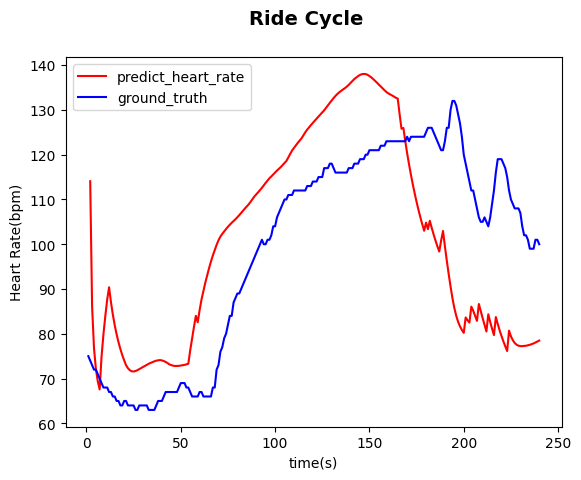

In [83]:
gt = []
file2 = './model/polar_011_ride1.csv'
with open(file2, 'r') as f:
    reader = csv.reader(f)
    for i in reader:
      gt.append(int(i[1]))

fig = plt.figure()
ax=fig.add_subplot(1, 1, 1)

hrtime = np.linspace(1, 240, len(predict))
xhrvals = np.linspace(1, 240, 240)

yhrinterp = np.interp(xhrvals, hrtime, predict)
static_df = pd.DataFrame(yhrinterp)
static_ema = static_df.ewm(span=30).mean()
fig.suptitle('Ride Cycle', fontsize=14, fontweight='bold')
ax.set_xlabel("time(s)")
ax.set_ylabel("Heart Rate(bpm)")

plt.plot(xhrvals, static_ema, c='r', label='predict_heart_rate')
plt.plot(xhrvals, gt, c='b', label='ground_truth')

plt.legend()
plt.show()